In [27]:
#Importing the raw data from csv

import pandas as pd
import numpy as np
data = pd.read_csv('Covid_data.csv')
df = pd.DataFrame (data)
df.columns = ['Day-Month', 'Demand 2019', 'HOEP 2019', 'Date 2020', 'Demand 2020', 'HOEP 2020', 'COVID Cases', '2019-2020 DD', '2019-2020 PD']

data.head()

,Day-Month,Demand 2019,HOEP 2019,Date 2020,Demand 2020,HOEP 2020,COVID Cases,2019-2020 DD,2019-2020 PD
0,01-Jan,407273,$ 6.99,2020-01-01,338635.0,$ 0.55,NaN,-16.9%,-92.12%
1,02-Jan,450409,$ 27.66,2020-01-02,362851.0,$ 0.01,NaN,-19.4%,-99.96%
2,03-Jan,454382,$ 13.56,2020-01-03,369581.0,$ 16.59,NaN,-18.7%,22.31%
3,04-Jan,435563,$ 9.50,2020-01-04,361837.0,$ 15.05,NaN,-16.9%,58.44%
4,05-Jan,417771,$ 13.41,2020-01-05,359681.0,$ 5.69,NaN,-13.9%,-57.60%


In [28]:
#Covid19 data limitation, some days there are no reported COVID19 cases, code is used to fill NAN with zero 

df['COVID Cases'] = df['COVID Cases'].fillna(0)
df.head()


,Day-Month,Demand 2019,HOEP 2019,Date 2020,Demand 2020,HOEP 2020,COVID Cases,2019-2020 DD,2019-2020 PD
0,01-Jan,407273,$ 6.99,2020-01-01,338635.0,$ 0.55,0.0,-16.9%,-92.12%
1,02-Jan,450409,$ 27.66,2020-01-02,362851.0,$ 0.01,0.0,-19.4%,-99.96%
2,03-Jan,454382,$ 13.56,2020-01-03,369581.0,$ 16.59,0.0,-18.7%,22.31%
3,04-Jan,435563,$ 9.50,2020-01-04,361837.0,$ 15.05,0.0,-16.9%,58.44%
4,05-Jan,417771,$ 13.41,2020-01-05,359681.0,$ 5.69,0.0,-13.9%,-57.60%


In [38]:
df[['2019-2020 DD', '2019-2020 PD']] = df[['2019-2020 DD', '2019-2020 PD'
                    ]].replace('%','', regex=True).astype(float)
df.head()

,Day-Month,Demand 2019,HOEP 2019,Date 2020,Demand 2020,HOEP 2020,COVID Cases,2019-2020 DD,2019-2020 PD
0,01-Jan,407273,6.99,2020-01-01,338635.0,0.55,0.0,-16.9,-92.12
1,02-Jan,450409,27.66,2020-01-02,362851.0,0.01,0.0,-19.4,-99.96
2,03-Jan,454382,13.56,2020-01-03,369581.0,16.59,0.0,-18.7,22.31
3,04-Jan,435563,9.50,2020-01-04,361837.0,15.05,0.0,-16.9,58.44
4,05-Jan,417771,13.41,2020-01-05,359681.0,5.69,0.0,-13.9,-57.60


In [39]:
df.dtypes


Day-Month        object
Demand 2019       int64
HOEP 2019        object
Date 2020        object
Demand 2020     float64
HOEP 2020        object
COVID Cases     float64
2019-2020 DD    float64
2019-2020 PD    float64
dtype: object

In [41]:
df[['HOEP 2019', 'HOEP 2020']] = df[['HOEP 2019', 'HOEP 2020'
                      ]].replace('\$','', regex = True)

In [42]:
df[['HOEP 2019', 'HOEP 2020']] = df[['HOEP 2019', 'HOEP 2020'
                      ]].replace(' ','', regex = True)

In [44]:
df[['HOEP 2019', 'HOEP 2020']] = df[['HOEP 2019', 'HOEP 2020'
                      ]].replace(' ','', regex = True).astype(float)

In [56]:
df.dtypes
df1 = df[['HOEP 2019', 'HOEP 2020']]
df2 = df[['Demand 2019', 'Demand 2020']]

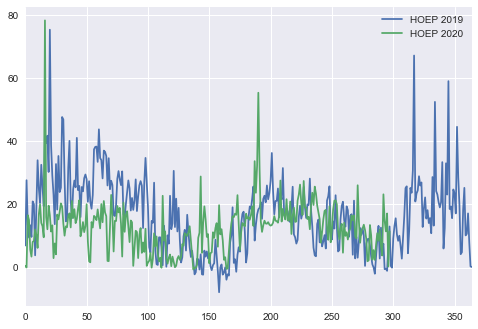

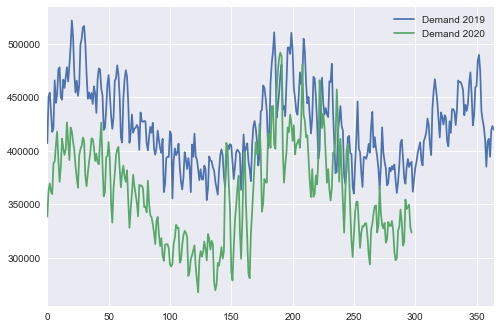

In [57]:
df1.plot()
df2.plot()

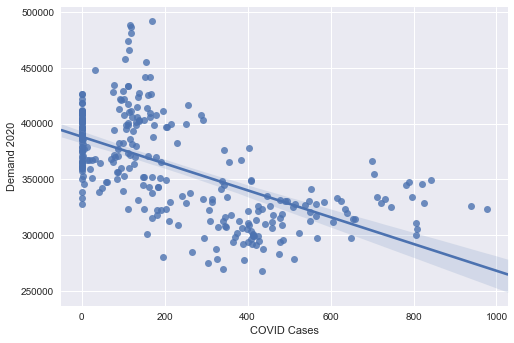

In [51]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates

sns.regplot(x="COVID Cases", y="Demand 2020", data=data);

In [59]:
sns.residplot(x="COVID Cases", y="HOEP 2020", data=data.query("dataset == 'I'"),
              scatter_kws={"s": 80});

IndexError: index 2 is out of bounds for axis 0 with size 2

In [60]:
#COVID19 cases Year to date linestyle using Seaborn

import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates

plt.style.use('seaborn')
    
df['COVID19 New cases'] = df['COVID19 New cases'].fillna(0)
    
data['Date 2020'] = pd.to_datetime(data['Date 2020'])
data.sort_values('Date 2020', inplace=True)
Date = data['Date 2020']
Covid19 = data['COVID19 New cases']
plt.plot_date(Date, Covid19, linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.title('COVID19 Cases Year to date')
plt.xlabel('Year to date 2020')
plt.ylabel('Cases')

plt.gca().axes.get_xaxis().set_visible(False)
plt.tight_layout()

plt.show()

KeyError: 'COVID19 New cases'

In [61]:
#COVID19 cases Year to date Barchart using Seaborn

import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
    
plt.style.use('seaborn')
  
data = pd.read_csv(r'C:\\Users\\loret\\Documents\\York University\\Group Project\\Consolidated Data.csv')
df = pd.DataFrame (data, columns= ['Date 2020','Ontario Demand 2020','HOEP 2020','COVID19 New cases'])
    
df['COVID19 New cases'] = df['COVID19 New cases'].fillna(0)
    
data['Date 2020'] = pd.to_datetime(data['Date 2020'])
data.sort_values('Date 2020', inplace=True)
Date = data['Date 2020']
Covid19 = data['COVID19 New cases']
plt.bar(Date, Covid19, linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
    
plt.gca().axes.get_xaxis().set_visible(False)
 
plt.title('COVID19 Cases Year to date')
plt.xlabel('Year to date 2020')
plt.ylabel('Cases')

plt.tight_layout()
   
plt.show()

FileNotFoundError: [Errno 2] File b'C:\\\\Users\\\\loret\\\\Documents\\\\York University\\\\Group Project\\\\Consolidated Data.csv' does not exist: b'C:\\\\Users\\\\loret\\\\Documents\\\\York University\\\\Group Project\\\\Consolidated Data.csv'

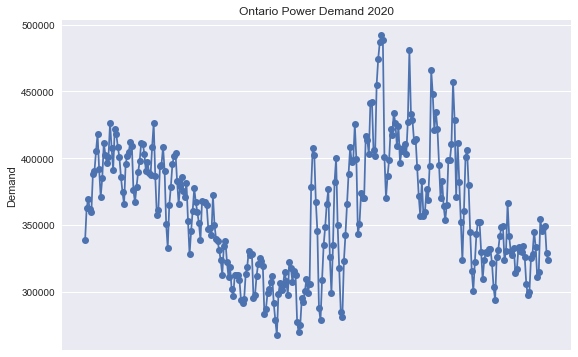

In [27]:
#Ontario Power Demand Year To date linestyle using Seaborn

import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
import pandas as pd
plt.style.use('seaborn')
 
data = pd.read_csv(r'C:\\Users\\loret\\Documents\\York University\\Group Project\\Consolidated Data.csv')
df = pd.DataFrame (data, columns= ['Date 2020','Ontario Demand 2020','HOEP 2020','COVID19 New cases'])
  
data['Date 2020'] = pd.to_datetime(data['Date 2020'])
data.sort_values('Date 2020', inplace=True)
Date = data['Date 2020']
Demand = data['Ontario Demand 2020']
plt.plot_date(Date, Demand, linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()

plt.gca().axes.get_xaxis().set_visible(False)

plt.title('Ontario Power Demand 2020')
plt.xlabel('Year to date 2020')
plt.ylabel('Demand')
 
    
plt.show()

Text(0.5, 1.0, 'Ontario Demand Year to Date')

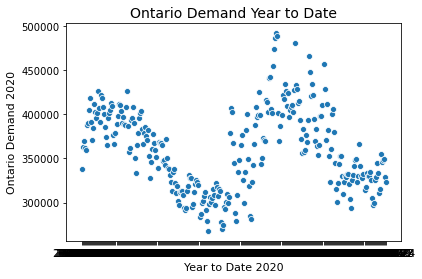

In [34]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame (data, columns= ['Date 2020','Ontario Demand 2020','HOEP 2020','COVID19 New cases'])
df['COVID19 New cases'] = df['COVID19 New cases'].fillna(0)
 
df = sns.scatterplot(x = df["Date 2020"].values, y = df["Ontario Demand 2020"].values)



plt.xlabel("Year to Date 2020", size=11)
plt.ylabel("Ontario Demand 2020", size=11)
plt.title("Ontario Demand Year to Date 2020", size=12)

Text(0.5, 1.0, 'HOEP')

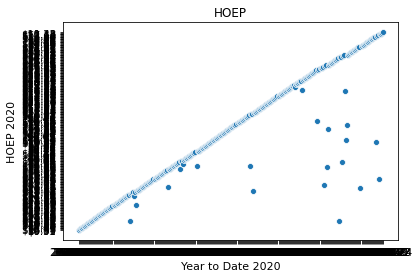

In [36]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame (data, columns= ['Date 2020','Ontario Demand 2020','HOEP 2020','COVID19 New cases'])
df['COVID19 New cases'] = df['COVID19 New cases'].fillna(0)
 
df = sns.scatterplot(x = df["Date 2020"].values, y = df["HOEP 2020"].values)



plt.xlabel("Year to Date 2020", size=11)
plt.ylabel("HOEP 2020", size=11)
plt.title("HOEP", size=12)